In [2]:
cd ..

/home/bastien/EPFL/Projects/VITA/clearaudio


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import io
import os
import matplotlib
import matplotlib.pyplot as plt

import torch
import torchaudio
import librosa
import librosa.display
import time
from pathlib import Path

from clearaudio.transforms import signal
from clearaudio.datasets import audio
from clearaudio.utils.utils import print_stats, play_audio_vscode
from clearaudio.viz import plots

plt.style.use('dark_background')
[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
  matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]


In [5]:
HQ_DIR = Path().cwd() / 'samples' / 'hq'
LQ_DIR = Path().cwd() / 'samples' / 'lq'
CONFIG_DIR = Path().cwd() / 'clearaudio' / 'conf' 
Path(LQ_DIR).mkdir(parents=True, exist_ok=True)
SW_SAMPLE = HQ_DIR / 'starwars.wav'
PIANO_SAMPLE = HQ_DIR / 'sample1.wav'

----------
Source: sample1.wav
----------
Sample Rate: 44100
Shape: (2, 6260369)
Dtype: torch.float32
 - Max:      0.573
 - Min:     -0.549
 - Mean:     0.000
 - Std Dev:  0.058

tensor([[ 0.0042,  0.0043,  0.0044,  ..., -0.0022, -0.0020, -0.0020],
        [ 0.0037,  0.0036,  0.0039,  ..., -0.0012, -0.0013, -0.0013]])



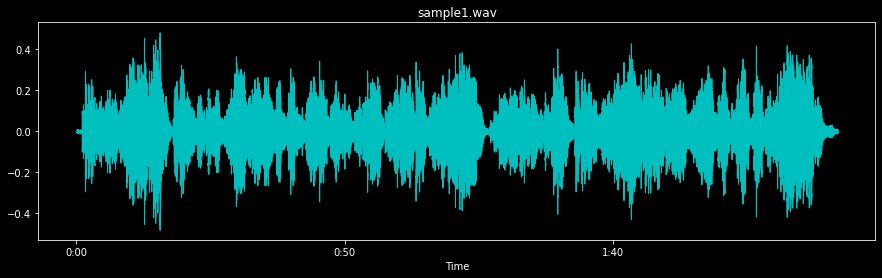

In [6]:
clip = audio.load_audio_clip(PIANO_SAMPLE)
print_stats(clip.waveform, clip.sample_rate, clip.name)
plots.plot_waveform(clip.waveform, clip.sample_rate, title=clip.name, color='c')

In [7]:
# Mono sample
waveform, sample_rate, name = audio.load_audio_item(PIANO_SAMPLE, mono=True)
print_stats(waveform, sample_rate, name)
plots.plot_waveform(waveform, sample_rate, title=name, color='c')

lq = HQ_DIR / 'sample1_mono.wav'
torchaudio.save(str(lq), waveform, sample_rate)

AttributeError: module 'clearaudio.datasets.audio' has no attribute 'load_audio_item'

9

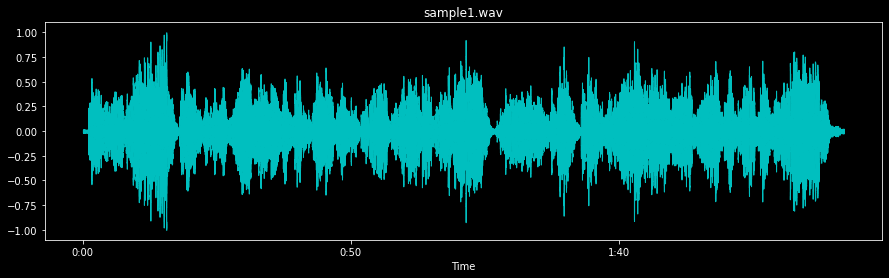

In [7]:
sox = signal.SoxEffectTransform()
sox.normalize_gain()
waveform, sample_rate = sox.apply_tensor(waveform, sample_rate)

# norm_hq = HQ_DIR / 'norm_sample1.wav'
# torchaudio.save(str(norm_hq), waveform, sample_rate)
plots.plot_waveform(waveform, sample_rate, title=name, color='c')

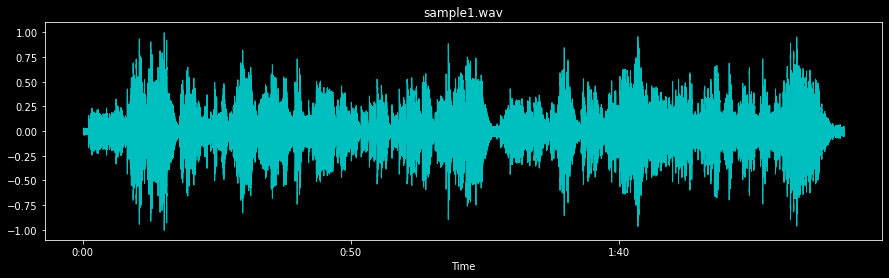

In [8]:
sox = signal.SoxEffectTransform()
sox.add_equalizer(600, -30, 5)
sox.add_equalizer(2000, -8, 1)
sox.add_equalizer(8000, -25, 0.7)
sox.normalize_gain()
eq, sr = sox.apply_tensor(waveform, sample_rate)
plots.plot_waveform(eq, sr, title=name, color='c')

In [11]:
lq = LQ_DIR / 'test_eq_sample.wav'
torchaudio.save(str(lq), eq, sr)

<AxesSubplot:title={'center':'Compaison HQ / LQ'}, xlabel='Time (ms)'>

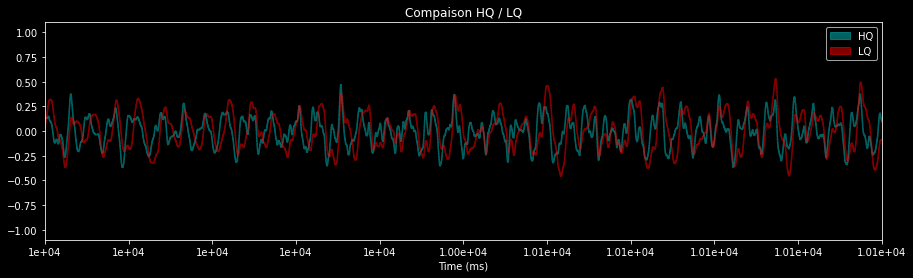

In [16]:
plots.compare_waveforms(waveform, sample_rate, eq, 
    title='Compaison HQ / LQ', 
    label_left='HQ', 
    label_right='LQ',
    xlim=[10, 10.1], x_axis='ms')

In [18]:
df = audio.find_audio_files(HQ_DIR, "wav", LQ_DIR)

formats: can't open input file `/mnt/c/Users/Kirell/work/clearaudio/samples/hq/skip/empty.wav': WAVE: RIFF header not found
Error loading audio file: failed to open file /mnt/c/Users/Kirell/work/clearaudio/samples/hq/skip/empty.wav


In [19]:
df

,name,sample_rate,num_frames,num_channels,path,duration
0,sample1,44100,6260369,2,/mnt/c/Users/Kirell/work/clearaudio/samples/hq...,141.958481
1,sample1_mono,44100,6260369,1,/mnt/c/Users/Kirell/work/clearaudio/samples/hq...,141.958481
2,starwars,22050,1323000,1,/mnt/c/Users/Kirell/work/clearaudio/samples/hq...,60.000000


60.0